In [100]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [141]:
import math

In [184]:
path = "C:\\Users\\Dark Viper\\Desktop\\lena.tiff"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

In [185]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256,dtype=float)
    for i in range(0,row):
        for j in range(0,col):
             y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='edge', alpha=0.25)
    plt.show()
    return y

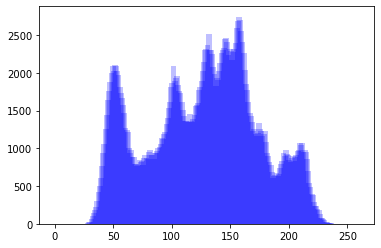

In [186]:
h=Hist(img)

In [187]:
cnt = 0
for i in range(0, len(h)):
    if h[i]>0:
           cnt += h[i]
            
print(cnt)

262144.0


In [188]:
prob=[]
for i in range (len(h)):
    h[i]=h[i]/cnt
    prob.append(h[i])

In [206]:
#prob


In [204]:
def masi_entropy(thresholds,prob):
    r= -1
    #print(prob)
    thresholds.insert(0,0)
    thresholds.append(256)
    #print(thresholds)
    classes = len(thresholds) -1
    #print(classes)
    w = {}
    output = {}
    for i in range(classes):
        if thresholds[i+1] ==256:
            w_values = w.values()
            s=0
            for value in w_values:
                s+=value
            w_gen = 1 - s 
        else:
            w_gen = np.sum(prob[thresholds[i]:thresholds[i+1]])
        w["w"+str(i)] = w_gen
    #print(w)
        out = 0
        #print(w)
        if w_gen > 0:
            for j in range(thresholds[i],thresholds[i+1]):
                if prob[j]> 0:
                    out= out+(prob[j]/w["w"+str(i)]) * np.log(prob[j]/w["w"+str(i)])
            output["out"+str(i)] = out
    #print(output)
    src = {}
    for i in range(0,classes):
        src["class"+str(i)] = (1/(1-r))*(np.log(1-(1-r)*(output["out"+str(i)])))
    #print(src)
    src_classes = src.values()
    print(src_classes)
    src_total = 0
    for src_values in src_classes:
        src_total+= src_values
    return src_total

In [205]:
thresholds = [97,164]
print(masi_entropy(thresholds,prob))

dict_values([1.1101443790918746, 1.1188059078141497, 1.1047834272354389])
3.3337337141414634


0.15854644775390625

0.003719329833984375
0.005344390869140625
0.009033203125
0.006160736083984375
0.003452301025390625


256

In [60]:
# threshold values
# 97,164
# 81,126,175
# 72,110,146,182
# 63,94,127,162,194

In [142]:
print(np.log(156111))


11.958322571669738
11.958322571669738


In [26]:
#path = "C:\\Users\\Dark Viper\\Desktop\\lena.tiff"
#img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

In [27]:
 #cv2_result = cv2.calcHist([img],[0],None,[256],[0,256])